In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=np.arange(-100,100)
y=1/(1+np.exp(-x))

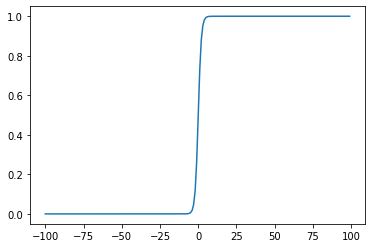

In [5]:
plt.plot(x,y)

In [6]:
adv=pd.read_csv('advertising.csv')

In [7]:
adv

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0


In [8]:
adv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 58.7+ KB


In [9]:
adv['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [10]:
adv.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [11]:
x=adv.iloc[:,[0,1,2,3]].values
y=adv.iloc[:,-1].values
print(x.shape,y.shape)

(1000, 4) (1000,)


In [12]:
np.set_printoptions(suppress=True)

In [13]:
x


array([[   68.95,    35.  , 61833.9 ,   256.09],
       [   80.23,    31.  , 68441.85,   193.77],
       [   69.47,    26.  , 59785.94,   236.5 ],
       ...,
       [   51.63,    51.  , 42415.72,   120.37],
       [   55.55,    19.  , 41920.79,   187.95],
       [   45.01,    26.  , 29875.8 ,   178.35]])

In [14]:
from sklearn.preprocessing import StandardScaler
# standardize the number based on size of number

In [15]:
sc=StandardScaler()
s=sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(s,
                                               y ,
                                               test_size= 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 4) (200, 4) (800,) (200,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.965

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.99      0.98      0.98        89

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [22]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [23]:
print(confusion_matrix(y_test,model.predict(x_test)))

[[110   1]
 [  2  87]]


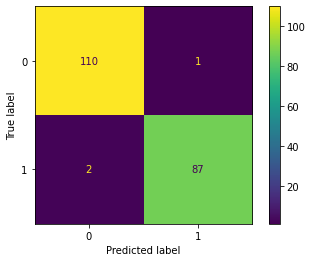

In [24]:
plot_confusion_matrix(model,x_test,y_test)
# here default threshold is 0.5